In [1]:
from instance_selection.model import MetaSelectionModel
from query_completion.model import MetaQACModel
from util.vgg.vgg_net import channel_mean
from query_completion.beam import GetCompletions
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


W0422 22:03:48.204109 4737414592 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [6]:
#ImageQAC = MetaQACModel('../query_experiment_visual/')
ImageQAC = MetaQACModel('../query_experiment_refer/')
ImageQAC.MakeSessionAndRestore(2)

INFO:tensorflow:Restoring parameters from ../query_experiment_refer/model.bin


I0422 22:56:26.330513 4737414592 tf_logging.py:115] Restoring parameters from ../query_experiment_refer/model.bin


In [3]:
Selection = MetaSelectionModel('../selection_experiment_4_19/')
Selection.MakeSessionAndRestore(2)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0422 22:03:55.085441 4737414592 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0422 22:03:56.614351 4737414592 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0422 22:03:58.655138 4737414592 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Restoring parameters from ../selection_experiment_4_19/model.bin


I0422 22:04:00.450666 4737414592 tf_logging.py:115] Restoring parameters from ../selection_experiment_4_19/model.bin


Query:  "b"			
1. 	"boat in the water" 
2. 	"boat in water" 
3. 	"black and white surfboard" 

 Predicted Instance Classes:
1. [u'boat' u'water' u'ocean']
2. [u'boat' u'water']
3. [u'surfboard']


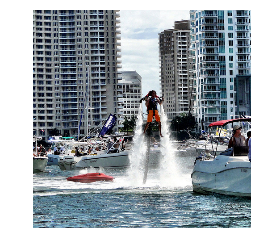

In [40]:
example_image = np.load('../data/visual/processed_images_224/2377384.npy')
ImageQAC.Lock(example_image-channel_mean)

prefix = 'b'
comp_list = list(GetCompletions(['<S>'] + list(prefix), ImageQAC, branching_factor=4, beam_size=100))
top_queries = [''.join(q.words[1:-1]) for q in comp_list[:-4:-1]]
plt.imshow(example_image)
plt.axis('off')
print('Query:  "{}"\t\t\t'.format(prefix))
cnt = 1
for item in top_queries:
    print('{}. \t"{}" '.format(cnt, item))
    cnt+=1
print('\n Predicted Instance Classes:')
cnt = 1
for item in top_queries:
    print('{}. {}'.format(cnt, Selection.predict(item, top_k = None)[0]))
    cnt+=1

Query:  "the "			
1. 	"the shirt is black" 
2. 	"the shoes are black" 
3. 	"the batter is holding a bat" 

 Predicted Instance Classes:
1. [u'shirt' u'man' u'jersey']
2. [u'shoe' u'gym_shoe']
3. [u'bat' u'batter']


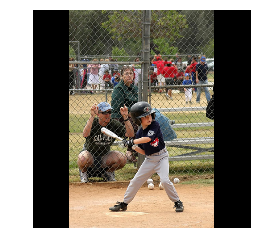

In [5]:
example_image = np.load('../data/visual/processed_images_224/2377407.npy')
ImageQAC.Lock(example_image-channel_mean)

prefix = 'b'
comp_list = list(GetCompletions(['<S>'] + list(prefix), ImageQAC, branching_factor=4, beam_size=100))
top_queries = [''.join(q.words[1:-1]) for q in comp_list[:-4:-1]]
plt.imshow(example_image)
plt.axis('off')
print('Query:  "{}"\t\t\t'.format(prefix))
cnt = 1
for item in top_queries:
    print('{}. \t"{}" '.format(cnt, item))
    cnt+=1
print('\n Predicted Instance Classes:')
cnt = 1
for item in top_queries:
    print('{}. {}'.format(cnt, Selection.predict(item, top_k = None)[0]))
    cnt+=1

Query:  ""			
1. 	"sky" 
2. 	"water" 
3. 	"top" 

 Predicted Instance Classes:
1. [u'sky']
2. [u'water']
3. shirt


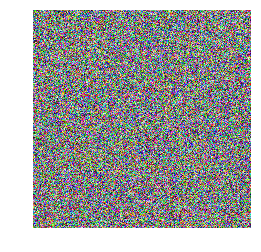

In [11]:
example_image = np.random.random((224,224,3))
ImageQAC.Lock(example_image-channel_mean)


prefix = 'b'
comp_list = list(GetCompletions(['<S>'] + list(prefix), ImageQAC, branching_factor=4, beam_size=100))
top_queries = [''.join(q.words[1:-1]) for q in comp_list[:-4:-1]]
plt.imshow(example_image)
plt.axis('off')
print('Query:  "{}"\t\t\t'.format(prefix))
cnt = 1
for item in top_queries:
    print('{}. \t"{}" '.format(cnt, item))
    cnt+=1
print('\n Predicted Instance Classes:')
cnt = 1
for item in top_queries:
    print('{}. {}'.format(cnt, Selection.predict(item, top_k = None)[0]))
    cnt+=1

In [7]:
example_image = np.load('../data/visual/processed_images_224/2377407.npy')
ImageQAC.Lock(example_image-channel_mean)

prefix = ['t','th','the ','the m', 'the ma','the man','the man w','the man wi','the man with s']

for p in prefix:
    comp_list = list(GetCompletions(['<S>'] + list(p), ImageQAC, branching_factor=4, beam_size=100))
    top_query = ''.join(comp_list[-1].words[1:-1])
    print('Query: {}  Completion: {}\n'.format(p, top_query))


Query: t  Completion: trees

Query: th  Completion: the grass

Query: the   Completion: the grass

Query: the m  Completion: the man

Query: the ma  Completion: the man

Query: the man  Completion: the man

Query: the man w  Completion: the man with white shirt

Query: the man wi  Completion: the man with white shirt

Query: the man with s  Completion: the man with statue



In [29]:
import matplotlib.image as mpimg
mpimg.imread('query_seg/1.png')

IOError: [Errno 2] No such file or directory: 'query_seg/1.png'

In [30]:
os.getcwd()

'/Users/Sam/Desktop/School/Deep Learning/FinalProject/NLQAC_ObjSeg/code'